In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("mohrs_circle_notebook.ipynb")

# CEE 175: Geotechnical and Geoenvironmental Engineering

> **Alex Frantzis** <br> Cool Student >:3, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

Assignment Description

In [5]:
# Please run this cell, and do not modify the contents

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()
    
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In this assignment we'll be calculating and plotting the Mohr's circle in order to find the modes of maximum stress. We'll use the mathematically derived equations of the Mohr's circle and verify our results with the graphical methods for Mohr's circle. As a warm up, let's start off with some basic equations using the stress equations.

## Question 1: Stress Calculation

Write a function named `calcStress()` that calculates the normal and shear stresses on a plane at an arbitrary angle. This function has the following input argument:
* `normalX`, which is the original normal stress in the x direction.
* `normalY`, which is the original normal stress in the y direction.
* `shear`, which is the original shear stress.
* `theta`, which is the angle of rotation in degrees.

and the following output arguments.
* `new_normalX`, which is the normal stress in the x direction on the plane rotated counterclockwise at angle theta.
* `new_normalY`, which is the normal stress in the y direction on the plane rotated counterclockwise at angle theta.
* `new_shear`, which is the new shear stress on the plane rotated counterclockwise at angle theta.

####  Note: The input theta can be in either scalar or vector (np.array) form. You shouldn't have to think about this since we give you the correct functions to use to implement this trait, but it's good to think about when we use the function later.
---
```PYTHON
Examples:

>>> calcStress(55,25,20,0)
55,25,20

>>> calcStress(55,25,20,90)
25,55,20

>>> calcStress(200, 10, 100, 30)
239.1025, -29.1025, -32.2724
```
---
For a 2D stress state with normal stresses $\sigma_x, \sigma_y$ and shear stress $\tau_{xy}$,  
the **normal** and **shear** stresses on a plane rotated by angle $\theta$ (counterclockwise) are:

**Normal stress:**

$$
\sigma_{x'}
= \frac{\sigma_{xx}+\sigma_{yy}}{2}
+ \frac{\sigma_{xx}-\sigma_{yy}}{2}\cos(2\theta)
+ \tau_{xy}\sin(2\theta)
$$

$$
\sigma_{y'}
= \frac{\sigma_{xx}+\sigma_{yy}}{2}
- \frac{\sigma_{xx}-\sigma_{yy}}{2}\cos(2\theta)
- \tau_{xy}\sin(2\theta)
$$

**Shear stress:**

$$
\tau_{x'y'}
= -\frac{\sigma_x-\sigma_y}{2}\sin(2\theta)
+ \tau_{xy}\cos(2\theta)
$$

<center><img src="Mohrs_Diagram.png" width='650'/></center>

- $\theta$ is the physical rotation angle of the plane (radians or degrees).  
- Principal stresses occur where $\tau_\theta = 0$, and their values are $\sigma_{1,3} = C \pm R$.
- On Mohr's circle, a plane rotated by $\theta$ corresponds to a point at angle $2\theta$ from the positive $\sigma$-axis.
---
Note: We've already imported the numpy library. It is recommended that you use the trigonometric functions from there to implement this function. Be careful, since np.cos and np.sin take in radians as the default. We recommend querying an AI tool or looking at the documentation at https://numpy.org/doc/2.3/ to help in figuring out how to use these functions and their parameters.

In [6]:
# ANSWER CELL

# We have seperated the function into 3 subfunctions for you to implement.
def calcNormalX(normalX, normalY, shear, theta):
    new_normalX = ((normalX + normalY)/2) + ((normalX - normalY)/2) * np.cos(np.deg2rad(2 * theta)) + shear*np.sin(np.deg2rad(2 * theta)) # SOLUTION
    return new_normalX

def calcNormalY(normalX, normalY, shear, theta):
    newNormalY = ((normalX + normalY)/2) - ((normalX - normalY)/2) * np.cos(np.deg2rad(2 * theta)) - shear*np.sin(np.deg2rad(2 * theta)) # SOLUTION
    return newNormalY

def calcShear(normalX, normalY, shear, theta):
    new_shear = -1 * ((normalX - normalY)/2) * np.sin(np.deg2rad(2 * theta)) + shear*np.cos(np.deg2rad(2 * theta)) # SOLUTION
    return new_shear

In [3]:
# ANSWER CELL

def calcStress(normalX, normalY, shear, theta):
    new_normalX = calcNormalX(normalX, normalY, shear, theta)
    new_normalY = calcNormalY(normalX, normalY, shear, theta)
    new_shear = calcShear(normalX, normalY, shear, theta)

    return new_normalX, new_normalY, new_shear

In [4]:
# TEST YOUR FUNCTION HERE

q1 = calcStress(55, 25, 20, np.array([0,90])) # SOLUTION

# print result
print(f'New Stresses = {q1} %')
np.shape(q1)

New Stresses = (array([55., 25.]), array([25., 55.]), array([ 20., -20.])) %


(3, 2)

In [ ]:
grader.check("q1")

## Question 2: Optimize stresses

When dealing with stress diagrams, we often want to know what the worst-case scenario for the stresses is. We will explore a slightly different approach to doing this, opting to use an optimization algorithm on our function to determine the angle which maximizes the shear stress on a given stress distribution. Later on (or possibly already in your class), we will use the graphical method and see that this solution matches exactly in line with it.

---

An example of what the process should look like has been given below for you. We have imported the function `minimize_scalar` from the `scipy.optimize` library (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html). Try looking at the documentation or querying AI to get an explanation of its functionality and parameters.


In [125]:
from scipy.optimize import minimize_scalar

def maxNormalXAngle(normalX, normalY, shear):

    #Creating dummy function that takes in theta and returns the negative value of the normal stress in the x direction
    def calculateNormalX(theta):
        new_normalX = calcNormalX(normalX, normalY, shear, theta)
        return -new_normalX

    # calculates the angle which minimizes -new_normalX, or equivalently maximizes newNormalX. We print out the result here for you to see but it is not necessary since our function is bounded and continuous and will thus converge quickly to a solution.
    optimization_result = minimize_scalar(calculateNormalX, bounds = (0, 180), method = 'bounded')
    print("minimize scalar results: \n")
    print(optimization_result)

    optimal_theta = optimization_result.x
    max_normalX, _, _ = calcStress(normalX, normalY, shear, optimal_theta)
    return optimal_theta, max_normalX

#Testing function
q2_test = maxNormalXAngle(67, 67, 21)
print(f'\noptimal_theta = {round(q2_test[0], 1)}°')
print(f'\nmax normal stress = {round(q2_test[1], 1)}')

minimize scalar results: 

 message: Solution found.
 success: True
  status: 0
     fun: -88.0
       x: 44.99999996714489
     nit: 10
    nfev: 10

optimal_theta = 45.0°

max normal stress = 88.0


Write a function named `maxShearAngle()` that returns the angle in which the returned shear stress is highest. This function has the following input argument:
* `normalX`, which is the original normal stress in the x direction.
* `normalY`, which is the original normal stress in the y direction.
* `shear`, which is the original shear stress.
* `theta`, which is the angle of rotation in degrees.

and the following output arguments.
* `optimal_theta`, which is the theta which maximizes the shear.
---
```PYTHON
Examples:

>>> maxShearAngle(30, 30, 40)
0.0

>>> maxShearAngle(100, 0, 0)
135.0

>>> maxShearAngle(0, 100, 0)
45.0

>>> maxShearAngle(80, -20, 20)
145.9
```
---
Hint: Try copy and pasting from the example and changing the values that you're optimizing on!

In [126]:
# ANSWER CELL

def maxShearAngle(normalX, normalY, shear):

    # BEGIN SOLUTION NO PROMPT
    #Creating dummy function that takes in theta and returns the negative value of the normal stress in the x direction
    def calculateShearX(theta):
        new_shear = calcShear(normalX, normalY, shear, theta)
        return -new_shear

    # calculates the angle which minimizes -new_normalX, or equivalently maximizes newNormalX. We print out the result here for you to see but it is not necessary since our function is bounded and continuous and will thus converge quickly to a solution.
    optimization_result = minimize_scalar(calculateShearX, bounds = (0, 180), method = 'bounded')

    optimal_theta = optimization_result.x
    _, _, max_shear = calcStress(normalX, normalY, shear, optimal_theta)
    # END SOLUTION
    return optimal_theta, max_shear

In [127]:
# TEST YOUR FUNCTION HERE
q2 = maxShearAngle(80,-20,20) # SOLUTION

# print result
print(f'optimal_theta = {round(q2[0], 1)}°')
print(f'\nmax shear stress = {round(q2[1], 1)}')

optimal_theta = 145.9°

max shear stress = 53.9


In [ ]:
grader.check("q2")

## Question 3: Plotting

Now we will use our function from question 0 to plot the mohrs circle diagram and compare the results to what we expect and what we have done so far. The stress state will be 
* `normalX` = 1500
* `normalY` 200
* `shear` = 100

---
You will first use the `calcStress(normalX, normalY, shear, theta)` function you created previously to calculate the normalX and shear values corresponding to each angle in the array `theta_vals` that we have created for you.

Then you will create a `matplotlib.pyplot` figure stored in `fig_1` and perform the following tasks on the same figure:
* Plot the x axis normal stress values vs the shear values with normalX_vals on the X-axis and shear_vals on the Y-axis. 
* Set the figure title to  "Mohr circle diagram".
* Set the x-axis label to "normal stress, MPa".
* Set the y-axis label to "shear stress, MPa"
* Set the x-axis limits to (0,1600).
* Set the y-axis limits to (-800,800).
---
If you're running into trouble or have not used matplotlib before, check the documentation here (https://matplotlib.org/stable/users/index.html) or again, use AI as a tool to see what each function does and how they work together.

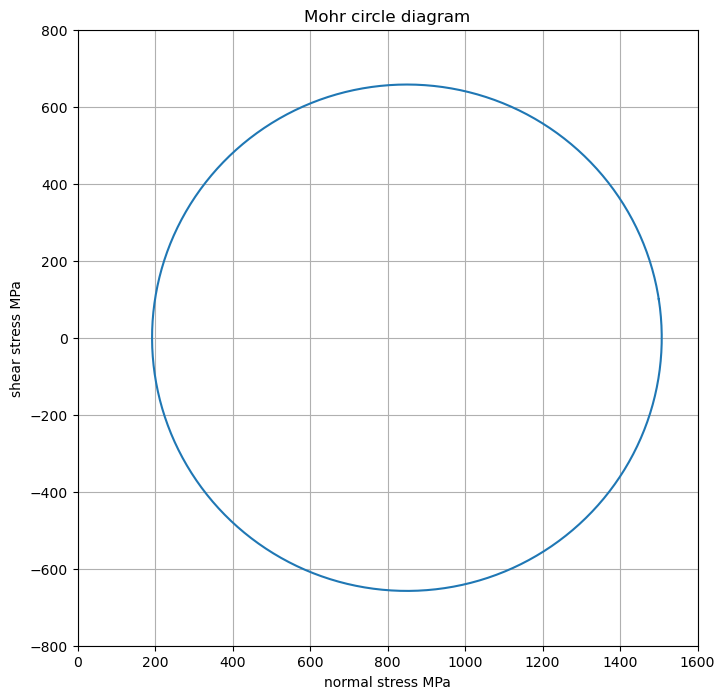

In [30]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Create figure 
fig_1 = plt.figure(figsize=(8,8))

# array of values for theta, ranging from [0, 180] with 360 equally spaced elements
theta_vals = np.linspace(0,180,360)

# BEGIN SOLUTION NO PROMPT
normalX_vals, normalY_vals, shear_vals = calcStress(1500,200,100,theta_vals)
plt.plot(normalX_vals, shear_vals)

plt.title('Mohr circle diagram')

plt.xlabel('normal stress MPa')
plt.ylabel('shear stress MPa')
plt.xlim([0,1600])
plt.ylim([-800,800])
plt.grid()
plt.show()

# END SOLUTION
""" # BEGIN PROMPT
# Calculate stress values
normalX_vals, normalY_vals, shear_vals = ...

# Plot mohrs circle using stress values
plt.plot(...)

# Set figure title
plt.title(...)

# Set axes labels
plt.xlabel(...)
plt.ylabel(...)

# Set axis limits 
plt.xlim(...)
plt.ylim(...)

# Add gridlines
plt.grid()

plt.show()
"""; # END PROMPT

In [ ]:
grader.check("q3")

## Hooray! You finished the graded portion :D
For your convenience, we have added a function below implementing the pole method that you learned in class. Try comparing it with what we've made so far to see how the results match up!

Center of the Circle (C): (40.00, 0)
Radius of the Circle (R): 69.46

Major Principal Stress (sigma_1): 109.46 kPa
Minor Principal Stress (sigma_3): -29.46 kPa
Maximum Shear Stress (tau_max): 69.46 kPa
Coordinates of the Pole (P): (-20, -35)


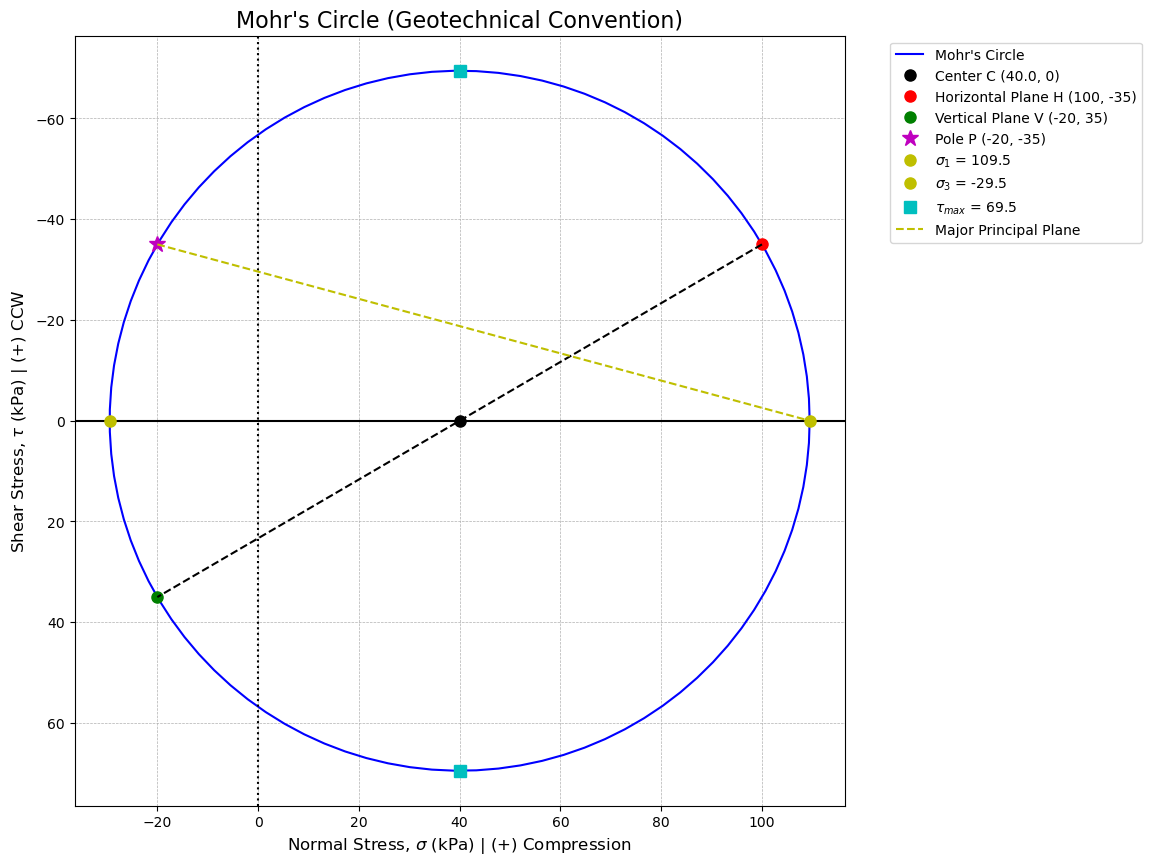

In [131]:
def plot_mohr_circle(sigma_h, tau_h, sigma_v, tau_v):
    """
    Calculates and plots Mohr's Circle for a given 2D stress state
    using the geotechnical sign convention.

    Args:
        sigma_h (float): Normal stress on the horizontal plane (+ comp).
        tau_h (float): Shear stress on the horizontal plane (+ ccw).
        sigma_v (float): Normal stress on the vertical plane (+ comp).
        tau_v (float): Shear stress on the vertical plane (+ ccw).
    """
    # --- 1. Calculate Mohr's Circle Parameters ---
    C = (sigma_h + sigma_v) / 2
    R = np.sqrt(((sigma_h - sigma_v) / 2)**2 + tau_h**2)

    print(f"Center of the Circle (C): ({C:.2f}, 0)")
    print(f"Radius of the Circle (R): {R:.2f}")

    # --- 2. Calculate Key Stress Values ---
    sigma_1 = C + R  # Major Principal Stress (max compression)
    sigma_3 = C - R  # Minor Principal Stress (max tension)
    tau_max = R
    sigma_at_tau_max = C

    print(f"\nMajor Principal Stress (sigma_1): {sigma_1:.2f} kPa")
    print(f"Minor Principal Stress (sigma_3): {sigma_3:.2f} kPa")
    print(f"Maximum Shear Stress (tau_max): {tau_max:.2f} kPa")

    # --- 3. Determine the Pole ---
    # Intersection of a horizontal line from H and a vertical line from V
    pole = (sigma_v, tau_h)
    print(f"Coordinates of the Pole (P): {pole}")

    # --- 4. Plotting ---
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Create and plot the circle
    angles = np.linspace(0, 2 * np.pi, 100)
    sigma_circle = C + R * np.cos(angles)
    tau_circle = R * np.sin(angles)
    ax.plot(sigma_circle, tau_circle, 'b-', label="Mohr's Circle")

    # Plot axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k', linestyle=':')

    # Plot key points
    ax.plot(C, 0, 'ko', markersize=8, label=f'Center C ({C:.1f}, 0)')
    ax.plot(sigma_h, tau_h, 'ro', markersize=8, label=f'Horizontal Plane H ({sigma_h}, {tau_h})')
    ax.plot(sigma_v, tau_v, 'go', markersize=8, label=f'Vertical Plane V ({sigma_v}, {tau_v})')
    ax.plot(pole[0], pole[1], 'm*', markersize=12, label=f'Pole P {pole}')
    ax.plot(sigma_1, 0, 'yo', markersize=8, label=f'$\\sigma_1$ = {sigma_1:.1f}')
    ax.plot(sigma_3, 0, 'yo', markersize=8, label=f'$\\sigma_3$ = {sigma_3:.1f}')
    ax.plot(sigma_at_tau_max, tau_max, 'cs', markersize=8, label=f'$\\tau_{{max}}$ = {tau_max:.1f}')
    ax.plot(sigma_at_tau_max, -tau_max, 'cs', markersize=8)

    # Plot connecting lines
    ax.plot([sigma_h, sigma_v], [tau_h, tau_v], 'k--') # Diameter
    ax.plot([pole[0], sigma_1], [pole[1], 0], 'y--', label='Major Principal Plane')

    # Formatting
    ax.set_title("Mohr's Circle (Geotechnical Convention)", fontsize=16)
    ax.set_xlabel('Normal Stress, $\\sigma$ (kPa) | (+) Compression', fontsize=12)
    ax.set_ylabel('Shear Stress, $\\tau$ (kPa) | (+) CCW', fontsize=12)
    ax.legend(loc='best', bbox_to_anchor=(1.05, 1))

    # Invert y-axis for standard geotechnical plot representation
    plt.gca().invert_yaxis()

    plt.show()


if __name__ == '__main__':
    # --- Input Stresses (Geotechnical Convention) from the screenshot ---
    # Positive (+) for Compression, Negative (-) for Tension
    # Positive (+) for Counter-Clockwise (CCW) shear, Negative (-) for Clockwise (CW)

    # Stresses on the Horizontal (H) Plane:
    sigma_horizontal = 100  # 100 kPa Compression -> Positive
    tau_horizontal = -35    # 35 kPa Clockwise shear -> Negative

    # Stresses on the Vertical (V) Plane:
    sigma_vertical = -20  # 20 kPa Tension -> Negative
    tau_vertical = 35     # 35 kPa Counter-Clockwise shear -> Positive

    plot_mohr_circle(sigma_horizontal, tau_horizontal, sigma_vertical, tau_vertical)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)